# WNTR Tutorial

## Imports
Import WNTR and additional Python packages that are needed for the tutorial
- Numpy is required to support numerical analysis
- Matplotlib is used for graphics
- Scipy is used to define lognormal fragility curves

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import lognorm
import wntr

In [3]:
# The following function is used below to extract public properties and methods on WNTR objects
def dir_public(obj):
    return [name for name in dir(obj) if not name.startswith('_')]

# 1. Water Network Model

The `WaterNetworkModel` object defines the water distribution system and simulation options. The object can be created from an EPANET INP file.

In [4]:
# Create water network model from an INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [5]:
# Basic description of the model
wn.describe(level=1)

{'Nodes': {'Junctions': 92, 'Tanks': 3, 'Reservoirs': 2},
 'Links': {'Pipes': 117, 'Pumps': 2, 'Valves': 0},
 'Patterns': 5,
 'Curves': {'Pump': 2, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 18}

In [6]:
# Explore properties and methods associated with the WaterNetworkModel
dir_public(wn)

['add_control',
 'add_curve',
 'add_junction',
 'add_pattern',
 'add_pipe',
 'add_pump',
 'add_reservoir',
 'add_source',
 'add_tank',
 'add_valve',
 'assign_demand',
 'control_name_list',
 'controls',
 'convert_controls_to_rules',
 'curve_name_list',
 'curves',
 'describe',
 'fcv_name_list',
 'fcvs',
 'from_dict',
 'from_gis',
 'get_control',
 'get_curve',
 'get_graph',
 'get_link',
 'get_links_for_node',
 'get_node',
 'get_pattern',
 'get_source',
 'gpv_name_list',
 'gpvs',
 'head_pump_name_list',
 'head_pumps',
 'junction_name_list',
 'junctions',
 'link_name_list',
 'links',
 'name',
 'node_name_list',
 'nodes',
 'num_controls',
 'num_curves',
 'num_junctions',
 'num_links',
 'num_nodes',
 'num_patterns',
 'num_pipes',
 'num_pumps',
 'num_reservoirs',
 'num_sources',
 'num_tanks',
 'num_valves',
 'options',
 'pattern_name_list',
 'patterns',
 'pbv_name_list',
 'pbvs',
 'pipe_name_list',
 'pipes',
 'power_pump_name_list',
 'power_pumps',
 'prv_name_list',
 'prvs',
 'psv_name_list',


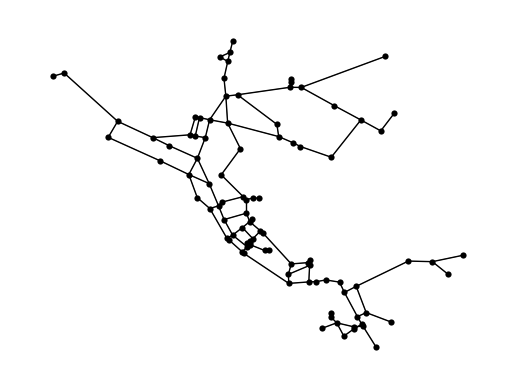

In [7]:
# Basic network graphic
ax = wntr.graphics.plot_network(wn, 

## Nodes
Nodes describe junctions, tanks, and reservoirs

In [8]:
# Print the names of all junctions, tanks, and reservoirs
print("Node names", wn.node_name_list)

Node names ['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275', 'River', 'Lake', '1', '2', '3']


In [9]:
# Print the names of just tanks
print("Tank names", wn.tank_name_list)

Tank names ['1', '2', '3']


In [10]:
# Get a tank object, check its type, print properties and methods
tank = wn.get_node('1')
print(type(tank))
print(dir_public(tank))

<class 'wntr.network.elements.Tank'>
['add_leak', 'bulk_coeff', 'coordinates', 'demand', 'diameter', 'elevation', 'get_volume', 'head', 'init_level', 'initial_quality', 'leak_area', 'leak_demand', 'leak_discharge_coeff', 'leak_status', 'level', 'max_level', 'min_level', 'min_vol', 'mixing_fraction', 'mixing_model', 'name', 'node_type', 'overflow', 'pressure', 'quality', 'remove_leak', 'tag', 'to_dict', 'to_ref', 'vol_curve', 'vol_curve_name']


In [11]:
# Change the max level
print("Original max level", tank.max_level)
tank.max_level = 10
print("New max level", tank.max_level)

Original max level 9.784080000000001
New max level 10


In [20]:
# Add a junction
wn.add_junction('new_junction', base_demand=0.0, demand_pattern=None, elevation=0.0, coordinates=None, demand_category=None)

In [21]:
# Remove a junction (as a node)
wn.remove_node('new_junction')

## Links

Links describe pipes, pumps, and valves

In [14]:
# Print the names of all links
print("Link names", wn.link_name_list)

Link names ['20', '40', '50', '60', '101', '103', '105', '107', '109', '111', '112', '113', '114', '115', '116', '117', '119', '120', '121', '122', '123', '125', '129', '131', '133', '135', '137', '145', '147', '149', '151', '153', '155', '159', '161', '163', '169', '171', '173', '175', '177', '179', '180', '181', '183', '185', '186', '187', '189', '191', '193', '195', '197', '199', '201', '202', '203', '204', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '229', '231', '233', '235', '237', '238', '239', '240', '241', '243', '245', '247', '249', '251', '257', '261', '263', '269', '271', '273', '275', '277', '281', '283', '285', '287', '289', '291', '293', '295', '297', '299', '301', '303', '305', '307', '309', '311', '313', '315', '317', '319', '321', '323', '325', '329', '330', '333', '10', '335']


In [15]:
# Print the names of just head pumps
print("Head pump names", wn.head_pump_name_list)

Head pump names ['10', '335']


In [16]:
# Get the name of links connected to a specific node
connected_links = wn.get_links_for_node('229')
print('Links connected to node 229 =', connected_links)

Links connected to node 229 = ['261', '263', '271']


In [17]:
# Get a pipe object, check its type, print properties and methods
pipe = wn.get_link('105')
print(type(pipe))
print(dir_public(pipe))

<class 'wntr.network.elements.Pipe'>
['bulk_coeff', 'check_valve', 'cv', 'diameter', 'end_node', 'end_node_name', 'flow', 'friction_factor', 'headloss', 'initial_setting', 'initial_status', 'length', 'link_type', 'minor_loss', 'name', 'quality', 'reaction_rate', 'roughness', 'setting', 'start_node', 'start_node_name', 'status', 'tag', 'to_dict', 'to_ref', 'velocity', 'vertices', 'wall_coeff']


In [18]:
# Change the diameter
print("Original diameter", pipe.diameter)
pipe.diameter = 10
print("New diameter", pipe.diameter)

Original diameter 0.30479999999999996
New diameter 10


In [27]:
# Add a pipe
wn.add_pipe(name="new_pipe", start_node_name="10", end_node_name="123", length=304.8, diameter=0.3048, roughness=100, minor_loss=0.0, initial_status='OPEN', check_valve=False)

In [28]:
# Remove a pipe
wn.remove_link("new_pipe")

## Demands and Patterns
Junctions can have multiple demands which are stored as Timeseries objects in a `demand_timeseries_list`. Each Timeseries contains a base value, pattern, and category.  Patterns contain multiliers and the pattern timestep.  

The following illustrates how to
* Compute expected demand (which accounts for base demand, demand patterns, and demand multiplier)
* Compute average expected demand (average value for a 24 hour period, also accounts for base demand, demand patterns, and demand multiplier)
* Add demands to a junction
* Modify demand base value and pattern
* Remove demands from a junction
* Plot expected and simulated demands

In [29]:
# Compute expected demand
expected_demand = wntr.metrics.expected_demand(wn)
print(expected_demand.head())

          10        15   20        35   40   50   60  601   61       101  ...  \
0.0      0.0  0.039116  0.0  0.103279  0.0  0.0  0.0  0.0  0.0  0.016059  ...   
3600.0   0.0  0.039116  0.0  0.107632  0.0  0.0  0.0  0.0  0.0  0.023249  ...   
7200.0   0.0  0.039116  0.0  0.108452  0.0  0.0  0.0  0.0  0.0  0.017497  ...   
10800.0  0.0  0.039116  0.0  0.108452  0.0  0.0  0.0  0.0  0.0  0.017257  ...   
14400.0  0.0  0.039116  0.0  0.112995  0.0  0.0  0.0  0.0  0.0  0.009108  ...   

         257  259  261  263  265  267  269  271  273  275  
0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3600.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7200.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10800.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14400.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 92 columns]


10    0.000000
15    0.016666
20    0.000000
35    0.108389
40    0.000000
dtype: float64


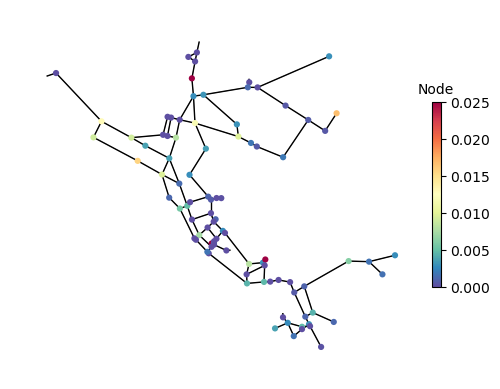

In [30]:
# Compute and plot average expected demand and 
AED = wntr.metrics.average_expected_demand(wn)
print(AED.head())
ax = wntr.graphics.plot_network(wn, node_attribute=AED, node_range=(0,0.025))

Index(['10', '20', '40', '50', '60', '601', '61', '120', '129', '164', '169',
       '173', '179', '181', '183', '184', '187', '195', '204', '206', '208',
       '241', '249', '257', '259', '261', '263', '265', '267', '269', '271',
       '273', '275'],
      dtype='object')


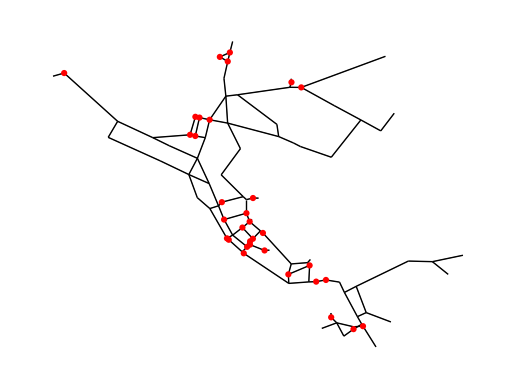

In [31]:
# Identify junctions with zero demand
zero_demand = AED[AED == 0].index
print(zero_demand)
ax = wntr.graphics.plot_network(wn, node_attribute=list(zero_demand))

In [32]:
# Get the demands on Junction 15
junction = wn.get_node('15')
print(junction.demand_timeseries_list)

<Demands: [<TimeSeries: base_value=6.30901964e-05, pattern_name='3', category='None'>]>


In [33]:
# Get the pattern associated with the demand
pattern = wn.get_pattern(junction.demand_timeseries_list[0].pattern_name)
pattern

<Pattern '3', multipliers=array([620., 620., 620., 620., 620., 360., 360.,   0.,   0.,   0.,   0., 360., 360., 360., 360., 360.,   0.,   0.,   0.,   0.,   0.,   0., 360., 360.])>

In [34]:
# Add a demand
junction.add_demand(base=0.015, pattern_name='1')

# Modify the base value of the original demand
junction.demand_timeseries_list[0].base_value = 0.005

# Add a pattern
wn.add_pattern('new', [1,1,1,0,0,0,1,0,0.5,0.5,0.5,1])
junction.demand_timeseries_list[0].pattern_name = "new"
print(junction.demand_timeseries_list)

<Demands: [<TimeSeries: base_value=0.005, pattern_name='new', category='None'>, <TimeSeries: base_value=0.015, pattern_name='1', category='None'>]>


<Axes: >

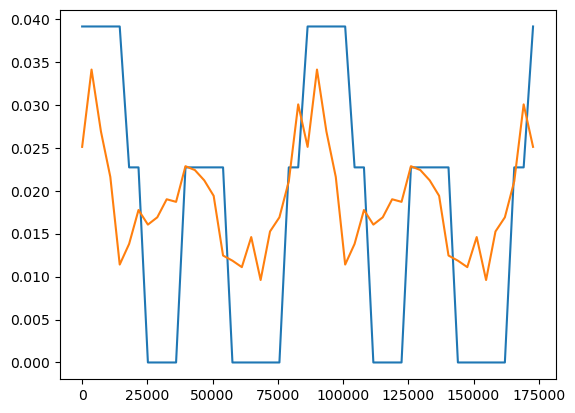

In [35]:
# Plot original and modified expected demands
new_expected_demand = wntr.metrics.expected_demand(wn) 

plt.figure()
ax = expected_demand.loc[0:48*3600, "15"].plot()
new_expected_demand.loc[0:48*3600, "15"].plot(ax=ax)

## Curves

Curves are used to define pump head curves, tank volume curves, and pump efficiency curves.  The following example illustrates how to work with pump head curves and tank volume curves.

<class 'wntr.network.elements.HeadPump'>


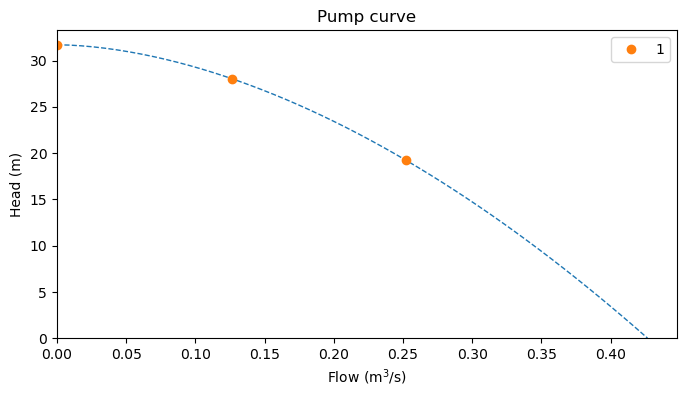

In [36]:
# Get a head pump object
pump = wn.get_link('10')
print(type(pump))

# Plot the head pump curve
ax = wntr.graphics.plot_pump_curve(pump)

In [ ]:
# Get the head curve and print the points
pump_curve_name = pump.pump_curve_name
curve = wn.get_curve(pump_curve_name)
print(curve.points)

# Modify the curve points and replot the pump curve
curve.points = [(0.10, 20)]
print(curve.points)
ax = wntr.graphics.plot_pump_curve(pump)

In [ ]:
wn.add_curve('new_tank_curve', 'VOLUME', [
   (1,  0),
   (2,  60),
   (3,  188),
   (4,  372),
   (5,  596),
   (6,  848),
   (7,  1114),
   (8,  1379),
   (9,  1631),
   (10, 1856),
   (11, 2039),
   (12, 2168),
   (13, 2228)])
tank = wn.get_node('2')
tank.vol_curve_name = 'new_tank_curve'
ax = wntr.graphics.plot_tank_volume_curve(tank)

## Controls

In [ ]:
for name, controls in wn.controls():
    print(name, controls)

In [ ]:
# Modify a control
control = wn.get_control('control 18')


In [ ]:
# Add a control

# Remove a control

In [ ]:
# Convert controls to rules
wn.convert_controls_to_rules()
for name, controls in wn.controls():
    print(name, controls)

## Model I/O

In [ ]:
# Write a INP file from the WaterNetworkModel
wntr.network.io.write_inpfile(wn, 'modified_network.inp', units='LPS')

In [ ]:
wn_dict = wn.to_dict()
#print(wn_dict)

In [ ]:
#to_graph
#write json

## Queries

In [ ]:
# Return all pipe diameters
all_pipe_diameters = wn.query_link_attribute('diameter')
print(all_pipe_diameters.head())

In [ ]:
# Return pipes diameters > 12 inches
large_pipe_diameters = wn.query_link_attribute('diameter', np.greater, 12*0.0254)
print(large_pipe_diameters.head())

In [ ]:
# Plot large pipes
ax = wntr.graphics.plot_network(wn, link_attribute=large_pipe_diameters, node_size=0, 
                           link_width=2, title="Pipes with diameter > 12 inches")

## Loops and generators
Loops and generators are commonly used to modify network components or run stochastic simulations

In [ ]:
# Loop over tank names and objects with a generator
for name, tank in wn.tanks():
    print("Max level for tank", name, "=", tank.max_level)

In [ ]:
# Loop over tank names and then get the associated tank object
for name in wn.tank_name_list:
    tank = wn.get_node(name)
    print("Max level for tank", name, "=", tank.max_level)

## Coordinates

## Pipe breaks and leaks

In [ ]:
wn = wntr.morph.split_pipe(wn, '123', '123_B', '123_node')
leak_node = wn.get_node('123_node')
leak_node.add_leak(wn, area=0.05, start_time=2*3600, end_time=12*3600)

# 2. Hydraulic and Water Quality Simulations

WNTR includes 2 simulators: the `EpanetSimulator` and the `WNTRSimulator`.  Both include the ability to run pressure dependent demand (PDD) or demand-driven (DD) hydraulic simulation.  Only the EpanetSimulator runs water quality simulations.

In [ ]:
# Create water network model from an INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

## Simulation options

In [ ]:
wn.options

In [ ]:
# Set the simulation duration to 4 days
wn.options.time.duration = 4*24*3600

In [ ]:
# PDD


## EPANET and WNTR Simulators

In [ ]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

## Simulation results

In [ ]:
# Plot timeseries of tank levels
tank_levels = results.node['pressure'].loc[:,wn.tank_name_list]
tank_levels.plot(title='Tank level')

# Plot timeseries of pump flowrates
pump_flowrates = results.link['flowrate'].loc[:,wn.pump_name_list]
pump_flowrates.plot(title='Pump flowrate')

# Plot pressure at hour 5 on the network
pressure_at_5hr = results.node['pressure'].loc[5*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, title='Pressure at 5 hours')

## Reset initial conditions

In [ ]:
wn.reset_initial_values()

# 3. Resilience Metrics

## Topographic

## Hydraulic

# 4. Fragility Curves

In [ ]:
FC = wntr.scenario.FragilityCurve()
FC.add_state('Minor', 1, {'Default': lognorm(0.5,scale=0.3)})
FC.add_state('Major', 2, {'Default': lognorm(0.5,scale=0.7)})
ax = wntr.graphics.plot_fragility_curve(FC, xlabel='Peak Ground Acceleration (g)')

# 5. Network Skeletonization

In [ ]:
# Create water network model from an INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')
wn.describe(level=1)

In [ ]:
# Skeletonize the network using a 12 inch pipe diameter threshold
skel_wn = wntr.morph.skeletonize(wn, 12*0.0254)
skel_wn.describe(level=1)

In [ ]:
# Plot the original and skeletonized networks
ax = wntr.graphics.plot_network(wn, node_size=10, title='Original')
ax = wntr.graphics.plot_network(skel_wn, node_size=10, title='Skeletonized')

In [ ]:
# Simulate hydraulics on the original and skeletonized models and plot average pressure
sim = wntr.sim.EpanetSimulator(wn)
results_original = sim.run_sim()

sim = wntr.sim.EpanetSimulator(skel_wn)
results_skel = sim.run_sim()

ax = results_original.node['pressure'].mean(axis=1).plot(label='Original')
ax = results_skel.node['pressure'].mean(axis=1).plot(ax=ax, label='Skeletonized')
plt.legend()

# 6. Valve Segmentation

In [ ]:
# Create water network model from an INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [ ]:
# Create a N-2 strategic valve layer
valve_layer = wntr.network.generate_valve_layer(wn, 'strategic', 2)
ax = wntr.graphics.plot_valve_layer(wn, valve_layer, add_colorbar=False)

In [ ]:
# Identify nodes and links that are in each valve segment
G = wn.to_graph()
node_segments, link_segments, seg_sizes = wntr.metrics.topographic.valve_segments(G, valve_layer)
print('Node segments')
print(node_segments)
print()
print('Link segments')
print(link_segments)
print()
print('Segment sizes')
print(seg_sizes)

In [ ]:
N = seg_sizes.shape[0]
cmap = wntr.graphics.random_colormap(N) # random color map helps visualize segments
ax = wntr.graphics.plot_network(wn, link_attribute=link_segments, node_size=0, link_width=2, link_range=[0,N], 
                                link_cmap=cmap, link_colorbar_label='Segment ID')
ax = wntr.graphics.plot_valve_layer(wn, valve_layer, add_colorbar=False, ax=ax)

# 7. Geospatial Capabilities

In [ ]:
# Create water network model from an INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [ ]:
wn_gis = wntr.network.to_gis(wn)
print(wn_gis.pipes.head())